# Clean the dataset

In [75]:
import pandas as pd
import numpy as np
import feather
import seaborn as sns
from matplotlib import pyplot as plt

In [99]:
FILENAME = "Datasets/merged_data"
data = feather.read_dataframe(f"{FILENAME}.feather")

In [77]:
data.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,Day,Day,Day,Day,507003.0,82.1,0.4,1.4,60351.0
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,Day,Day,Day,Day,1074475.0,77.0,2.9,1.9,66641.0


In [78]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County_x', 'State_x', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Population_County', 'Drive_County',
       'Transit_County', 'Walk_County', 'MedianHouseholdIncome_County'],
      dtype='object')

In [79]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06,2.840344e+06,2.840344e+06,2.840344e+06,2.840344e+06,2.840344e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02,1.931795e+06,7.579696e+01,4.839888e+00,2.463402e+00,6.909282e+04
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01,2.687058e+06,9.402942e+00,8.007604e+00,1.882469e+00,1.764732e+04
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.530000e+02,6.000000e+00,0.000000e+00,0.000000e+00,2.150400e+04
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00,4.078750e+05,7.400000e+01,1.100000e+00,1.400000e+00,5.758500e+04
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00,9.361860e+05,7.790000e+01,2.500000e+00,2.000000e+00,6.664100e+04
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00,2.149031e+06,8.030000e+01,5.800000e+00,2.700000e+00,7.816700e+04
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01,1.008157e+07,9.250000e+01,6.120000e+01,3.930000e+01,1.422990e+05


### Preliminary cleaning of irrelevant features

In [80]:
cat_cols = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
            'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
            'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
            'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

print("Number of categories in each:\n")
for c in cat_cols:
    print(c, len(data[c].unique()))

Number of categories in each:

Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [81]:
# remove features that are obviously irrelevant to analysis
remove = ['ID', 'Description', 'Distance(mi)', 'Number',
          'End_Time', 'End_Lat', 'End_Lng',
          'Country', 'Turning_Loop']
data.drop(remove, axis=1, inplace=True)

### Side

In [97]:
Counter(data['Side'])

Counter({'R': 2409662, 'L': 496947, ' ': 1})

In [98]:
data = data[data['Side']!=' ']

### Wind Chill
Since wind chill is calculated from wind speed and temperature, this attribute will be irrelevant

In [103]:
data.drop('Wind_Chill(F)', axis=1, inplace=True)

## Outlier Removal

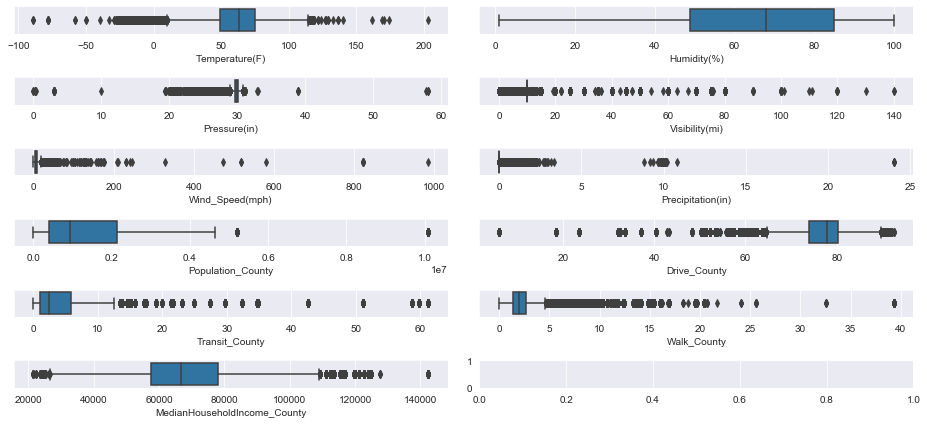

In [104]:
num_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
            'Wind_Speed(mph)', 'Precipitation(in)', 'Population_County', 
            'Drive_County', 'Transit_County', 'Walk_County', 'MedianHouseholdIncome_County']

sns.set_style('darkgrid')
f, axes = plt.subplots(6,2, figsize=(13,6))  
y = 0;
for name in num_cols:
    i, j = divmod(y, 2)
    b=sns.boxplot(x=data[name], ax=axes[i, j])
    b.set_xlabel(name)
    y = y+1

plt.tight_layout()
plt.show()

| Link | Information | Remove which instances |
| --- | --- | --- |
| https://bit.ly/3eEVeFr | Highest recorded windspeed is 231 mph | >200 mph |
| https://bit.ly/3hNPBXo | Highest recorded pressure is 32 in and lowest is 26 in | <27 in and >31 in |
| https://bit.ly/3eWhPNZ https://bit.ly/3kCS0WP | Lowest temperature recorded ~50 and highest is 112 | <50 F and >110 F |
| https://bit.ly/3xYLixY | Maximum visbility is 12 mi | >12 mi |

In [83]:
# Windspeed
data = data[data['Wind_Speed(mph)']<200]
# Pressure
data = data[(data['Pressure(in)']>27) & (data['Pressure(in)']<31)]
# Temperature
data = data[(data['Temperature(F)']>50) & (data['Temperature(F)']<110)]
# Visibility
data = data[(data['Visibility(mi)']>12) & (data['Temperature(F)']<12)]

### Investigating outliers in precipitation data

In [84]:
cols = ['Severity', 'City', 'County_x', 'State_x',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition']

In [85]:
data[(data['Precipitation(in)']>5) & (data['Precipitation(in)']<15)].sample(4)[cols]

,Severity,City,County_x,State_x,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition
2324170,2,Brooklyn,kings,new york,2017-08-18 20:35:00,75.2,NaN,89.0,30.41,10.0,6.9,9.96,Clear
1773880,2,Ochopee,collier,florida,2017-09-29 13:15:00,78.8,NaN,89.0,30.42,10.0,3.5,9.98,Overcast
1186093,3,Brooklyn,kings,new york,2017-04-26 09:15:00,55.4,NaN,94.0,30.41,5.0,16.1,10.00,Overcast
2149657,3,Brooklyn,kings,new york,2017-05-05 08:35:00,55.4,NaN,88.0,30.42,10.0,20.7,9.99,Overcast


In [86]:
from collections import Counter
Counter(data[data['Precipitation(in)']>5]['Weather_Condition'])

Counter({'Clear': 48,
         'Overcast': 55,
         'Partly Cloudy': 11,
         'Heavy Rain': 1,
         'Scattered Clouds': 3,
         'Mostly Cloudy': 5})

This analysis shows that in almost all of these instances, the category of weather condition were not even rain/heavy rain. Besides, further research of weather records on these particular dates in https://www.wunderground.com/ and https://www.timeanddate.com/ indeed showed that there were not significant rain on those days to have these absurd values. I will therefore remove instances where the precipitation was greater that 5 inches.

In [87]:
data = data[~(data['Precipitation(in)']>=5)]

## Handling NA values

In [88]:
print("Percentage of missing values:\n")
lst = []
for c in data.columns:
    val = sum(data[c].isnull())/len(data)*100
    lst.append((round(val,1), c))
for i in sorted(lst, reverse=True):
    if i[0]>0:
        print(i)

Percentage of missing values:

(44.1, 'Wind_Chill(F)')
(41.7, 'Precipitation(in)')
(2.7, 'Walk_County')
(2.7, 'Transit_County')
(2.7, 'Population_County')
(2.7, 'MedianHouseholdIncome_County')
(2.7, 'Drive_County')
(0.2, 'Weather_Condition')
(0.2, 'Visibility(mi)')
(0.1, 'Humidity(%)')


### Value imputation
I will impute values only for the weather features; the rest will simply be removed for simplicity. These weather features are most likely to be fairly similar according to the Airport Code (which is the airport-based weather station which is the closest one to location of the accident). Therefore, I will impute the missing values with the median of the group according to Airport Code.

In [89]:
weather_cols = ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Humidity(%)', 'Temperature(F)']
for c in weather_cols:
    # Impute with mean of group
    data[c] = data.groupby('Airport_Code')[c].apply(lambda x: x.fillna(x.mean()))
    # If a group is NA, then fill with mean of all
    data[c] = data[c].fillna(data[c].mean())

### Drop the rest of rows with NA

In [90]:
bef = len(data)
print("Before removing rows:", len(data))
data.dropna(inplace=True)
print("Number of rows removed", bef-len(data))

Before removing rows: 1837516
Number of rows removed 54115


## Final Analysis

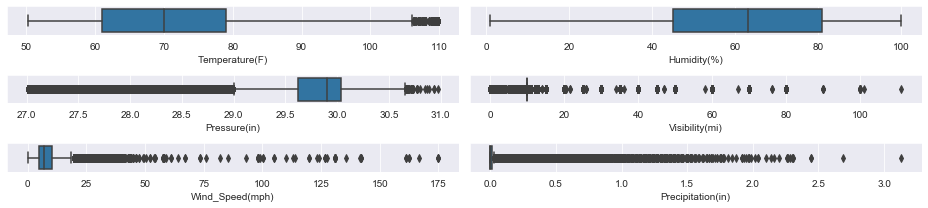

In [91]:
num_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
        'Wind_Speed(mph)', 'Precipitation(in)']

sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize=(13,3))  
y = 0;
for name in num_cols:
    i, j = divmod(y, 2)
    b=sns.boxplot(x=data[name], ax=axes[i, j])
    b.set_xlabel(name)
    y = y+1

plt.tight_layout()
plt.show()

It looks mostly reasonable now.

### Save the data

In [92]:
data.reset_index(inplace=True, drop=True)
data.to_feather("Datasets/cleaned_data.feather")